In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os
import sys

In [3]:
# ==== Пути ====
DATA_DIR = "../../data/checkpoints/exp14/vectorized_params"
PARAM_PATH = os.path.join(DATA_DIR, "params_matrix.npy")

# ==== Загрузка матрицы весов ====
params_matrix = np.load(PARAM_PATH)  # shape: (steps, dim)
print(f"Parameter matrix shape: {params_matrix.shape}")

# ==== Центрирование ====
X_centered = params_matrix - params_matrix.mean(axis=0)


Parameter matrix shape: (14070, 12730)


Explained variance ratios (first 10 components):
Component 1: 0.8829
Component 2: 0.1008
Component 3: 0.0131
Component 4: 0.0022
Component 5: 0.0004
Component 6: 0.0001
Component 7: 0.0000
Component 8: 0.0000
Component 9: 0.0000
Component 10: 0.0000
Component 11: 0.0000
Component 12: 0.0000
Component 13: 0.0000
Component 14: 0.0000
Component 15: 0.0000
Component 16: 0.0000
Component 17: 0.0000
Component 18: 0.0000
Component 19: 0.0000
Component 20: 0.0000


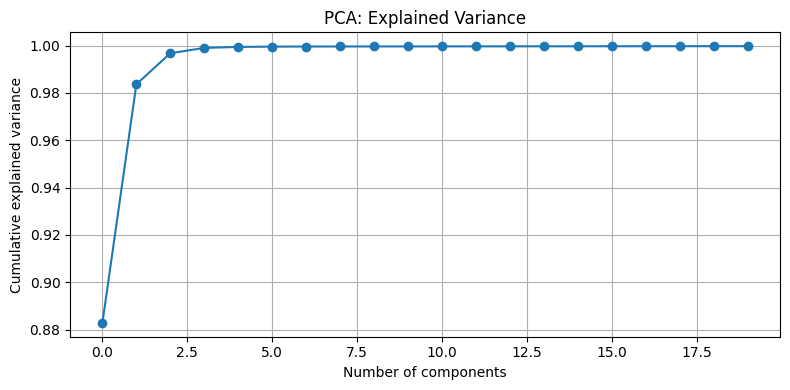

In [4]:
# ==== PCA ====
pca = PCA(n_components=20)  # можно взять больше при необходимости
X_pca = pca.fit_transform(X_centered)

print("Explained variance ratios (first 10 components):")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"Component {i+1}: {var:.4f}")

# ==== График объяснённой дисперсии ====
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("PCA: Explained Variance")
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(DATA_DIR, "explained_variance.png"))
plt.show()



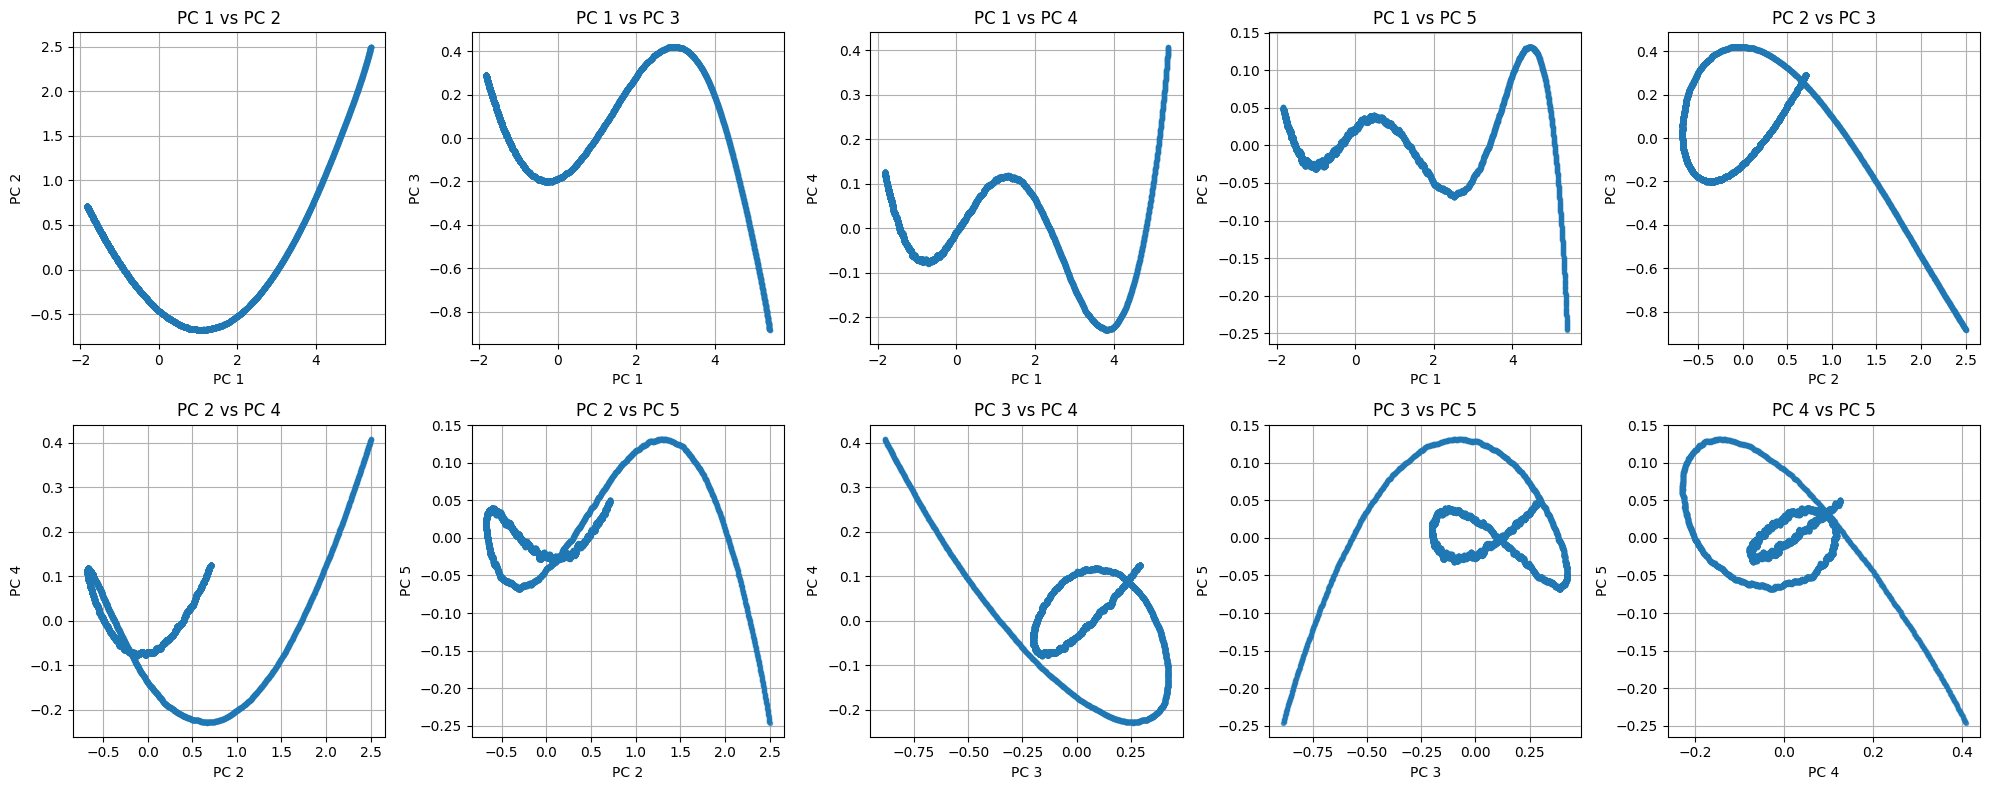

✅ Pairwise PCA plot saved to ../../data/checkpoints/exp14/vectorized_params/pairwise_pca_components.png


In [5]:
# ==== Парные графики для первых 5 компонент PCA ====
import itertools

# Комбинации (i, j) для 5 компонент (нумерация с 0)
pairs = list(itertools.combinations(range(5), 2))

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
for ax, (i, j) in zip(axes.flat, pairs):
    ax.plot(X_pca[:, i], X_pca[:, j], 'o-', alpha=0.6, markersize=3)
    ax.set_xlabel(f"PC {i+1}")
    ax.set_ylabel(f"PC {j+1}")
    ax.set_title(f"PC {i+1} vs PC {j+1}")
    ax.grid(True)

plt.tight_layout()
pairwise_path = os.path.join(DATA_DIR, "pairwise_pca_components.png")
plt.savefig(pairwise_path)
plt.show()
print(f"✅ Pairwise PCA plot saved to {pairwise_path}")


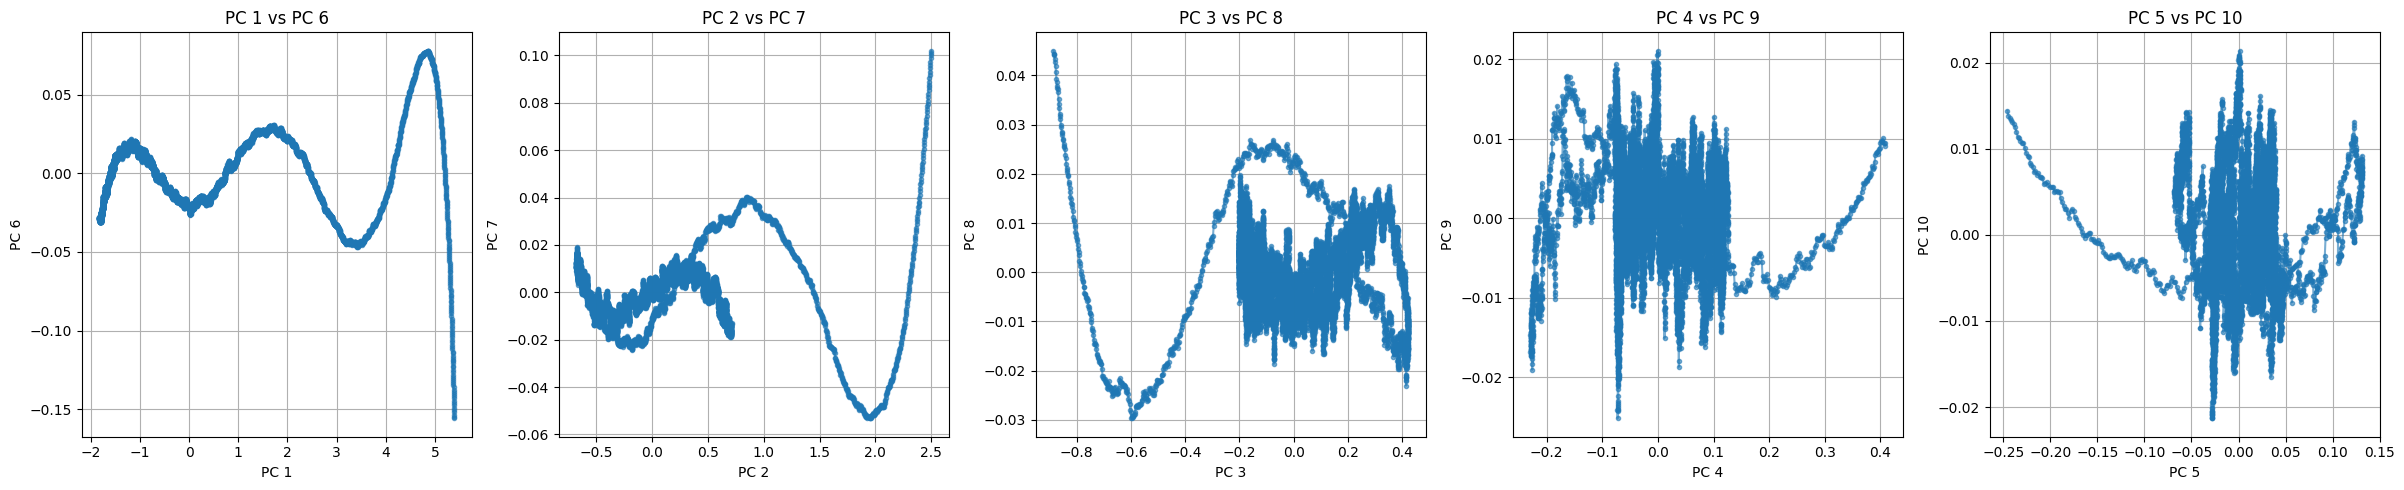

✅ Deep PCA pairwise plot saved to ../../data/checkpoints/exp14/vectorized_params/deep_pairwise_pca_components.png


In [6]:
# ==== Графики (1,6), (2,7), ..., (5,10) — чтобы показать шумовые компоненты ====
deep_pairs = [(0, 5), (1, 6), (2, 7), (3, 8), (4, 9)]  # (PC1, PC6), ..., (PC5, PC10)

fig, axes = plt.subplots(1, 5, figsize=(24, 5))
for ax, (i, j) in zip(axes, deep_pairs):
    ax.plot(X_pca[:, i], X_pca[:, j], 'o-', alpha=0.6, markersize=3)
    ax.set_xlabel(f"PC {i+1}")
    ax.set_ylabel(f"PC {j+1}")
    ax.set_title(f"PC {i+1} vs PC {j+1}")
    ax.grid(True)

plt.tight_layout()
deep_pairwise_path = os.path.join(DATA_DIR, "deep_pairwise_pca_components.png")
plt.savefig(deep_pairwise_path)
plt.show()
print(f"✅ Deep PCA pairwise plot saved to {deep_pairwise_path}")


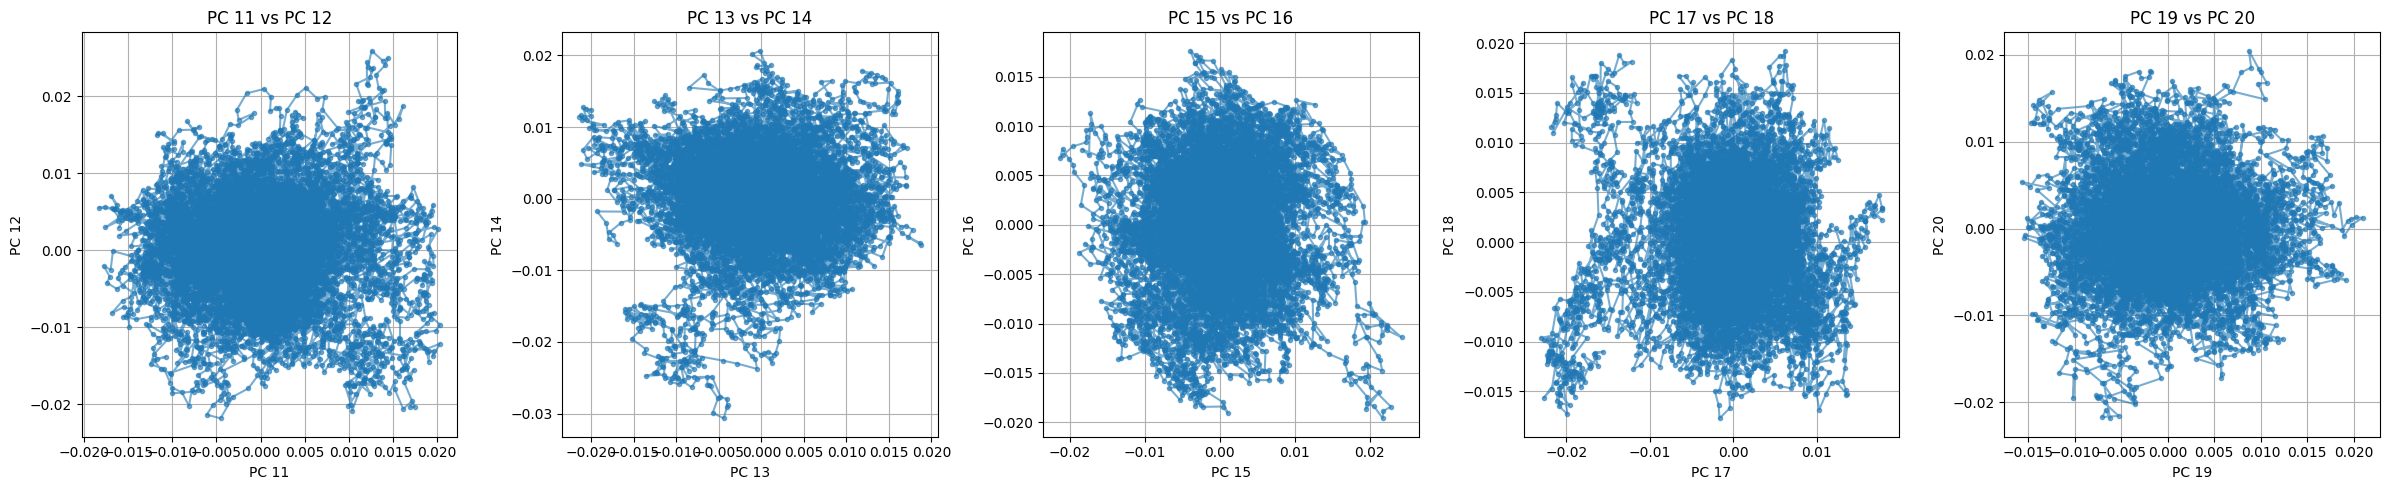

✅ Far-noise PCA pairwise plot saved to ../../data/checkpoints/exp14/vectorized_params/deep_noise_pca_components.png


In [7]:
# ==== Глубокие компоненты (11-12, ..., 19-20) для демонстрации шума ====
far_pairs = [(10, 11), (12, 13), (14, 15), (16, 17), (18, 19)]  # индексы

fig, axes = plt.subplots(1, 5, figsize=(24, 5))
for ax, (i, j) in zip(axes, far_pairs):
    if i >= X_pca.shape[1] or j >= X_pca.shape[1]:
        ax.axis("off")
        continue
    ax.plot(X_pca[:, i], X_pca[:, j], 'o-', alpha=0.6, markersize=3)
    ax.set_xlabel(f"PC {i+1}")
    ax.set_ylabel(f"PC {j+1}")
    ax.set_title(f"PC {i+1} vs PC {j+1}")
    ax.grid(True)

plt.tight_layout()
deep_noise_path = os.path.join(DATA_DIR, "deep_noise_pca_components.png")
plt.savefig(deep_noise_path)
plt.show()
print(f"✅ Far-noise PCA pairwise plot saved to {deep_noise_path}")
